**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**Read Dataset**

In [2]:
train_data = pd.read_csv(r"train.csv")
test_data = pd.read_csv(r"test.csv")

**Exploration of Data**

In [3]:
print(train_data.shape)
print(test_data.shape)

(31962, 3)
(17197, 2)


In [4]:
train_data.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [5]:
test_data.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


In [6]:
train_data.isnull().any()

id       False
label    False
tweet    False
dtype: bool

In [7]:
test_data.isnull().any()

id       False
tweet    False
dtype: bool

In [8]:
# checking for negative comments from the train dataset
train_data[train_data['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [9]:
train_data[train_data['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


**Visualization of Data**

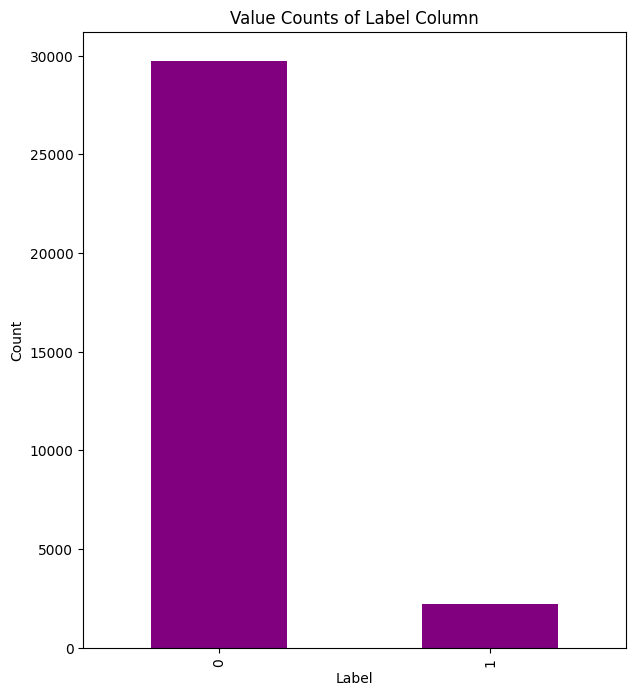

In [20]:
fig, ax = plt.subplots(figsize=(7, 8))
train_data['label'].value_counts().plot(kind='bar', color='purple', ax=ax)
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_title('Value Counts of Label Column')
plt.show()

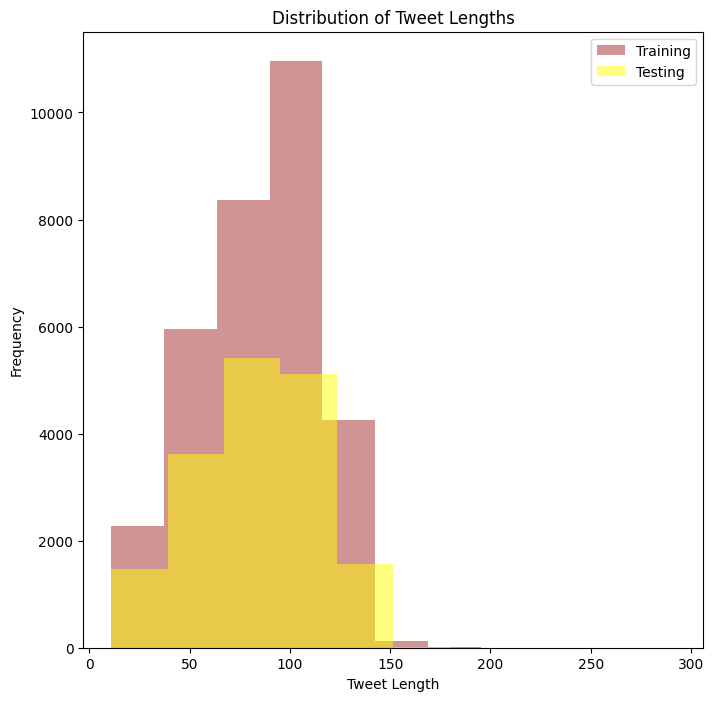

In [13]:
plt.figure(figsize=(8, 8))
plt.hist(train_data['tweet'].str.len(), color='brown', alpha=0.5, label='Training')
plt.hist(test_data['tweet'].str.len(), color='yellow', alpha=0.5, label='Testing')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [14]:
train_data['length'] = train_data['tweet'].str.len()
test_data['length']  = test_data['tweet'].str.len()

In [15]:
train_data.head()

,id,label,tweet,length
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [16]:
test_data.head()

,id,tweet,length
0,31963,#studiolife #aislife #requires #passion #dedic...,90
1,31964,@user #white #supremacists want everyone to s...,101
2,31965,safe ways to heal your #acne!! #altwaystohe...,71
3,31966,is the hp and the cursed child book up for res...,142
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",93


In [17]:
train_data.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                 length                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

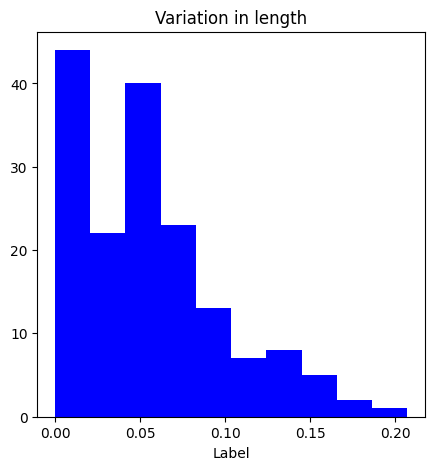

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(train_data.groupby('length').mean()['label'], color='blue')
ax.set_title('Variation in length')
ax.set_xlabel('Label')
plt.show()

In [21]:
import matplotlib.pyplot as plt
from collections import Counter


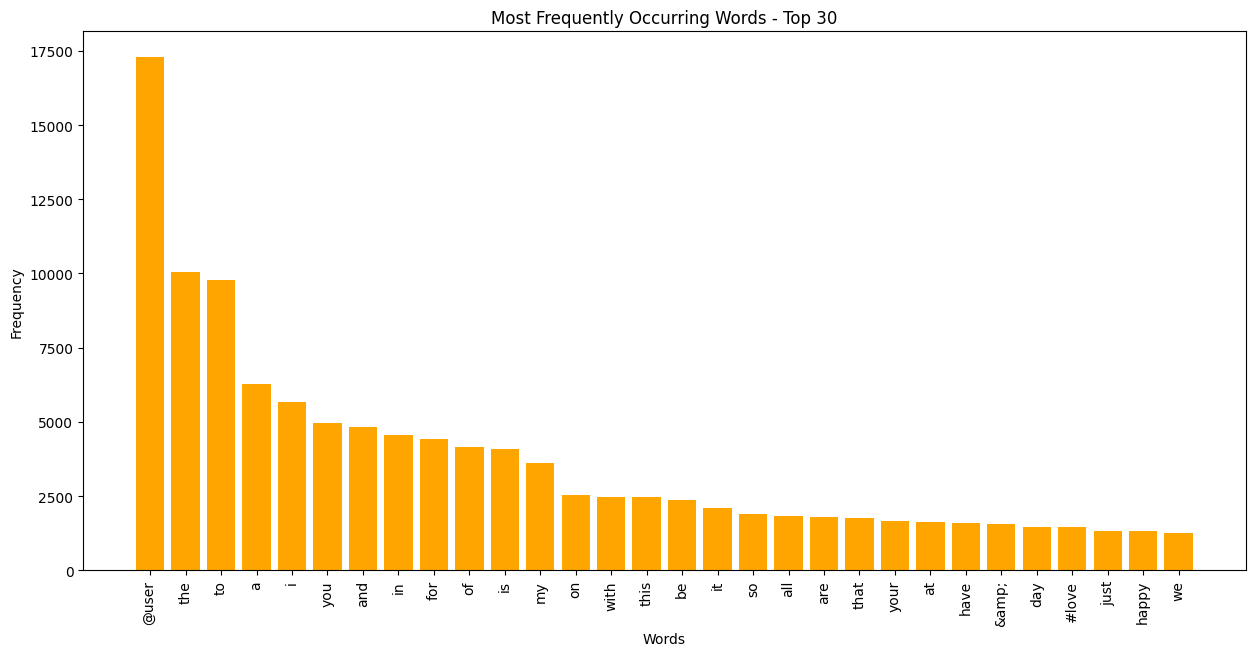

In [22]:
words = [word for tweet in train_data.tweet for word in tweet.split()]
word_freq = Counter(words)
top_words = word_freq.most_common(30)

plt.figure(figsize=(15,7))
plt.bar([word[0] for word in top_words], [word[1] for word in top_words], color="orange")
plt.title("Most Frequently Occurring Words - Top 30")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

In [24]:
from wordcloud import WordCloud



Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

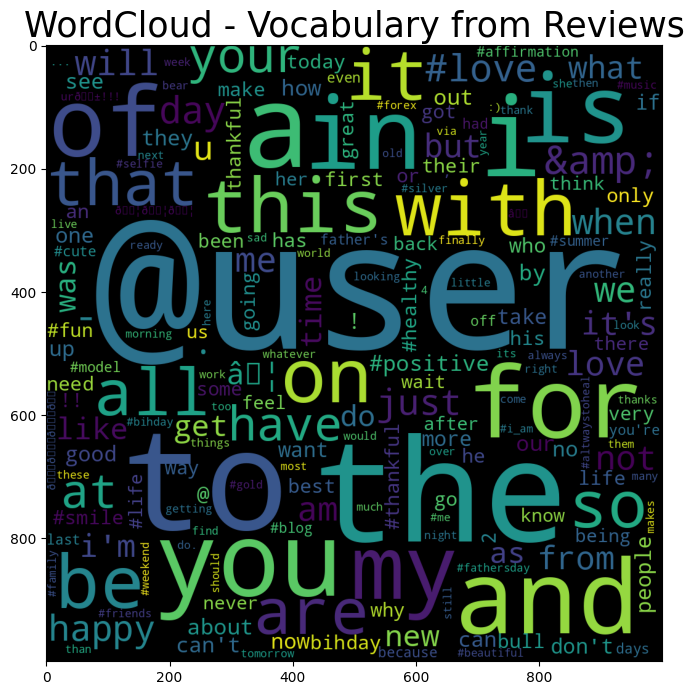

In [26]:
WordCloud = WordCloud(background_color = 'black', width = 1000, height= 1000).generate_from_frequencies(dict(word_freq))

plt.figure(figsize=(10,8))
plt.imshow(WordCloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize= 25)

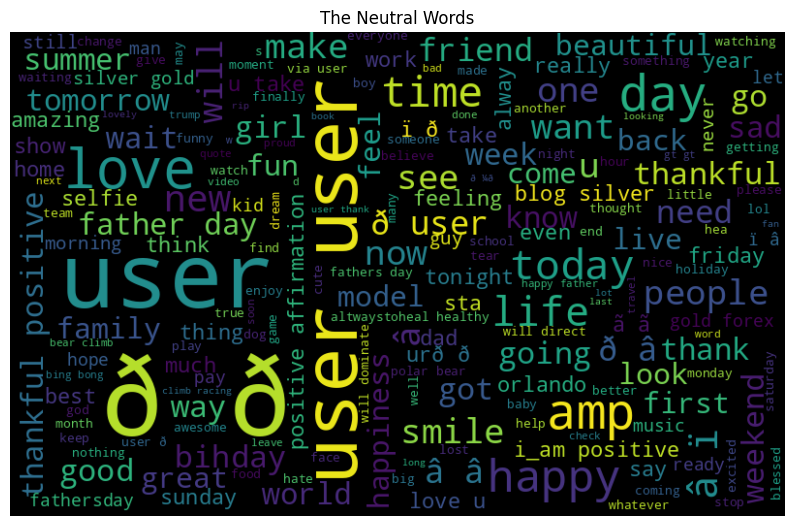

In [27]:
from wordcloud import WordCloud
normal_words =' '.join([text for text in train_data['tweet'][train_data['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

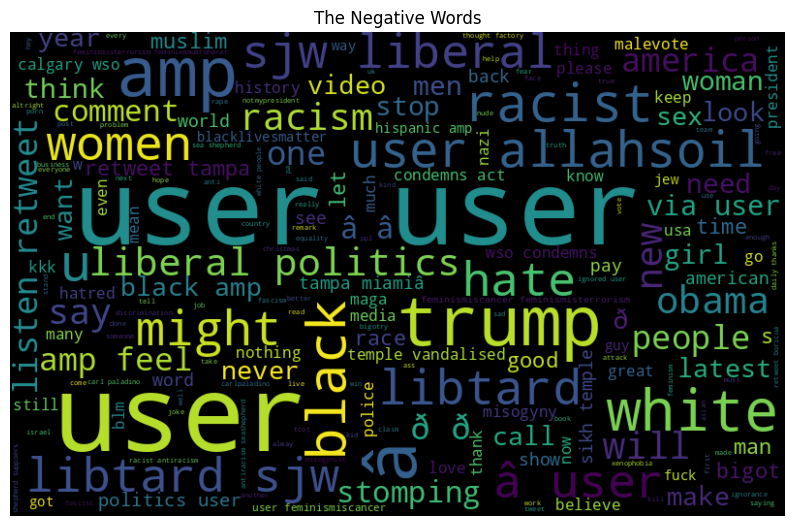

In [28]:
negative_words =' '.join([text for text in train_data['tweet'][train_data['label'] == 1]])

wordcloud = WordCloud(background_color = 'black', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [29]:
import regex as re 

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

**extracting hashtags from racist/sexist tweets**

In [30]:
HT_regular = hashtag_extract(train_data['tweet'][train_data['label'] == 0])
HT_negative = hashtag_extract(train_data['tweet'][train_data['label'] == 1])
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

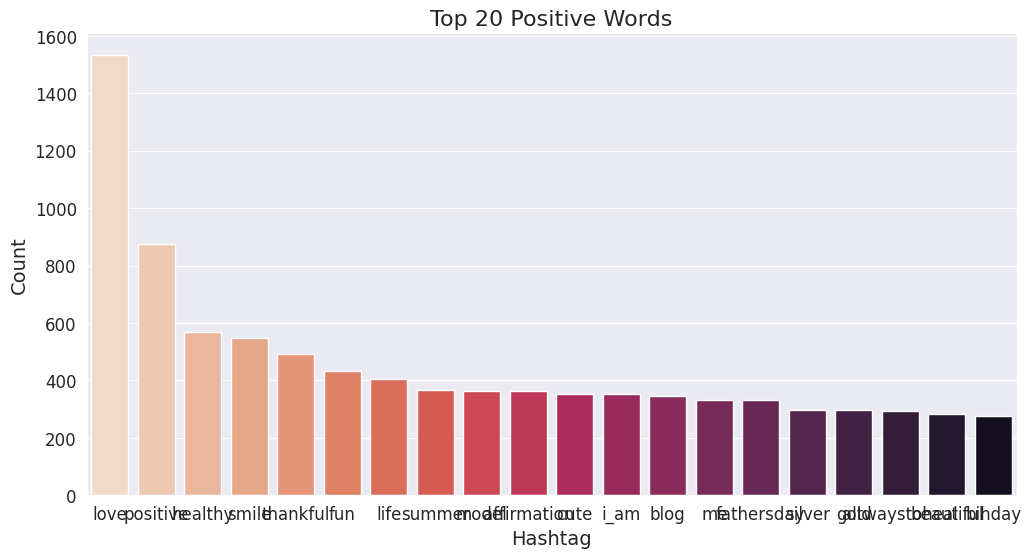

In [32]:
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})
d = d.nlargest(columns="Count", n=20)
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
ax = sns.barplot(data=d, x="Hashtag", y="Count", palette="rocket_r")
ax.set_title("Top 20 Positive Words", fontsize=16)
ax.set_xlabel("Hashtag", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.tick_params(labelsize=12)
plt.show()








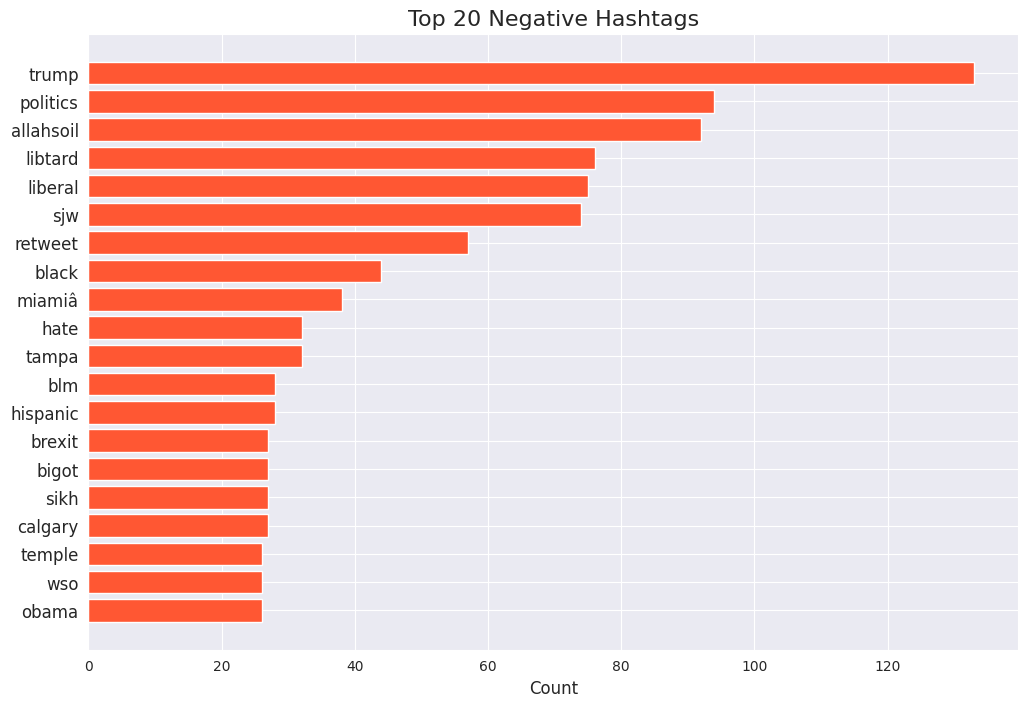

In [33]:
hashtags_freq = nltk.FreqDist(HT_negative)
top_hashtags = hashtags_freq.most_common(20)
hashtag_labels, hashtag_counts = zip(*top_hashtags)
fig, ax = plt.subplots(figsize=(12, 8))
y_pos = np.arange(len(hashtag_labels))
ax.barh(y_pos, hashtag_counts, color="#FF5733")
ax.set_yticks(y_pos)
ax.set_yticklabels(hashtag_labels, fontsize=12)
ax.invert_yaxis()  
ax.set_xlabel('Count', fontsize=12)
ax.set_title('Top 20 Negative Hashtags', fontsize=16)
plt.show()

In [34]:
tokenized_tweet = train_data['tweet'].apply(lambda x: x.split()) 
import gensim
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, 
            window=5, 
            min_count=2,
            sg = 1, 
            hs = 0,
            negative = 10, 
            workers= 2, 
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train_data['tweet']), epochs=20)

(6109391, 8411580)

In [35]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.664161741733551),
 ('podium', 0.6168620586395264),
 ('enroute', 0.6057301163673401),
 ('bay.', 0.60467129945755),
 ('#wanderlust', 0.6011881232261658),
 ('shopping!', 0.5861623883247375),
 ('#boardgames', 0.5858281850814819),
 ('coaching', 0.5837974548339844),
 ('#pamper', 0.582550048828125),
 ('7!', 0.5808157324790955)]

In [36]:
model_w2v.wv.most_similar(positive = "apple")

[('"mytraining"', 0.6976600885391235),
 ('mytraining', 0.6861924529075623),
 ('training"', 0.6664868593215942),
 ('app,', 0.6453892588615417),
 ('"my', 0.5943679213523865),
 ('app', 0.570250928401947),
 ('ta', 0.5597354769706726),
 ('ios', 0.5593786835670471),
 ("domino's", 0.5519899725914001),
 ('mp3', 0.5453092455863953)]

In [37]:
model_w2v.wv.most_similar(negative= "hate")

[('@', 0.04360441863536835),
 ('flying', 0.04349162057042122),
 ('hotel', 0.04173631966114044),
 ('#hungry', 0.037997543811798096),
 ('#foodie', 0.020413238555192947),
 ('â\x9c\x88ï¸\x8f', 0.016383681446313858),
 ('#community', 0.010798212140798569),
 ('ð\x9f\x8d»', 0.006098014768213034),
 ('de', 0.00571087934076786),
 ('#foodporn', -0.0002173128887079656)]

In [38]:
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train_data['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [40]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test_data['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

 **creating bag of words**

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train_data.iloc[:, 1]
print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [43]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


**Splitting the dataset**

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 40)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


**Standardization**

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

**Logistic Regression**

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))


Training Accuracy : 0.983313170080514
Validation Accuracy : 0.9475660117632336


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
